In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Regression_Performance_Metrics as rpm

In [2]:
# Generate synthetic data
np.random.seed(0)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 random points in [0, 2]
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

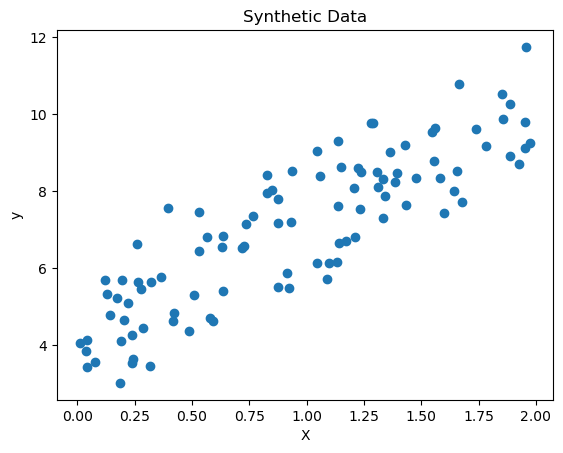

In [3]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()

In [4]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance
        self.theta = np.random.randn(n + 1, 1)  # Random initialization

        cost_history = np.zeros(self.iterations)

        for i in range(self.iterations):
            predictions = self.predict(X_b)
            errors = predictions - y

            # Update theta parameters
            self.theta -= (self.learning_rate / m) * (X_b.T.dot(errors))

            # Save the cost for each iteration
            cost_history[i] = self.compute_cost(X_b, y)

        return cost_history

    def predict(self, X):
        return X.dot(self.theta)

    def compute_cost(self, X, y):
        m = len(y)
        predictions = self.predict(X)
        cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
        return cost

In [5]:
model = LinearRegression(learning_rate=0.01, iterations=1000)
cost_history = model.fit(X, y)

# Make predictions
y_pred = model.predict(np.c_[np.ones((X.shape[0], 1)), X])  # Add intercept term

# Evaluate the model performance
print("Performance Metrics:")
print("MAE:", rpm.mean_absolute_error(y, y_pred))
print("MSE:", rpm.mean_squared_error(y, y_pred))
print("RMSE:", rpm.root_mean_squared_error(y, y_pred))
print("R-squared:", rpm.r_squared(y, y_pred))
print("Adjusted R-squared:", rpm.adjusted_r_squared(y, y_pred, X.shape[0], X.shape[1]))

Performance Metrics:
MAE: 0.8505642064878524
MSE: 0.9943116741935853
RMSE: 0.9971517809208312
R-squared: 0.74648543682434
Adjusted R-squared: 0.7438985535266291


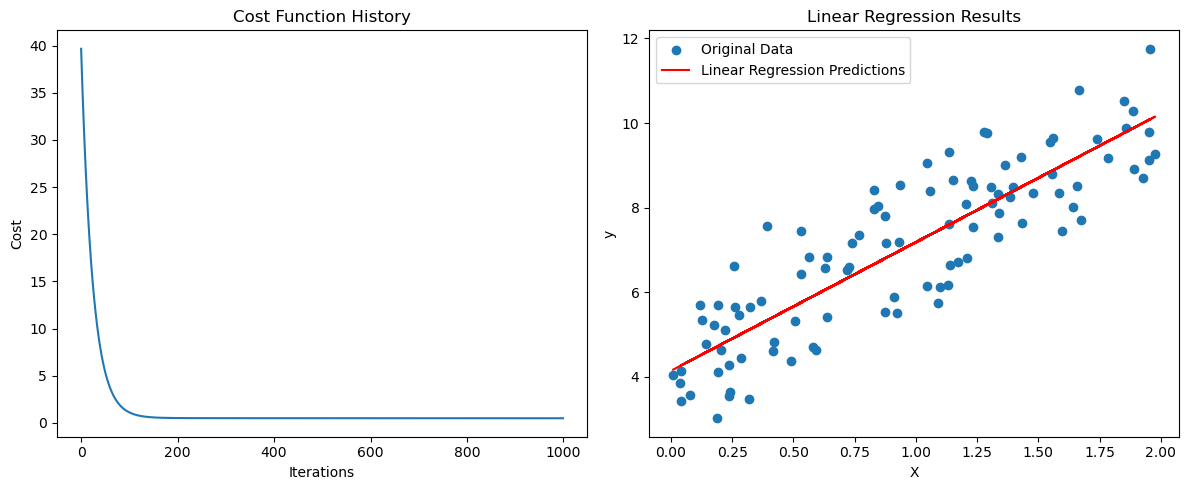

In [7]:
# Plotting the results and cost history
plt.figure(figsize=(12, 5))

# Plotting Cost History
plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function History")

# Plotting Predictions
plt.subplot(1, 2, 2)
plt.scatter(X, y, label="Original Data")
plt.plot(X, y_pred, "r-", label="Linear Regression Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Results")
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
class RidgeRegression:
    def __init__(self, alpha=1.0, iterations=1000, learning_rate=0.01):
        self.alpha = alpha
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.random.randn(n, 1)  # Random initialization
        for _ in range(self.iterations):
            predictions = X.dot(self.theta)
            errors = predictions - y
            # Update theta with L2 regularization
            self.theta -= (self.learning_rate / m) * (X.T.dot(errors) + self.alpha * self.theta)

    def predict(self, X):
        return X.dot(self.theta)

In [9]:
class LassoRegression:
    def __init__(self, alpha=1.0, iterations=1000, learning_rate=0.01):
        self.alpha = alpha
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.random.randn(n, 1)  # Random initialization
        for _ in range(self.iterations):
            predictions = X.dot(self.theta)
            errors = predictions - y
            # Update theta with L1 regularization
            gradient = (1 / m) * X.T.dot(errors)
            self.theta -= self.learning_rate * (gradient + self.alpha * np.sign(self.theta))

    def predict(self, X):
        return X.dot(self.theta)

In [10]:
class ElasticNetRegression:
    def __init__(self, alpha=1.0, l1_ratio=0.5, iterations=1000, learning_rate=0.01):
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.random.randn(n, 1)  # Random initialization
        for _ in range(self.iterations):
            predictions = X.dot(self.theta)
            errors = predictions - y
            # Update theta with Elastic Net regularization
            gradient = (1 / m) * X.T.dot(errors)
            l1_penalty = self.l1_ratio * self.alpha * np.sign(self.theta)
            l2_penalty = (1 - self.l1_ratio) * self.alpha * self.theta
            self.theta -= self.learning_rate * (gradient + l1_penalty + l2_penalty)

    def predict(self, X):
        return X.dot(self.theta)